# Análisis de Cota temporal de Insertion Sort

## Importando bibliotecas
- <b>Pandas</b>: Nos sirve para leer datos y filtrarlos.
- <b>Seaborn</b>: Es una biblioteca para graficar que nos permite interactuar con datos de Pandas.

- <i>Numpy y Matplotlib son dependencias de Pandas.</i>


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math

## Leyendo resultados
Primero, leemos el archivo de resultados de ejecución de insertion sort. <br />Para esto, vamos a abrirlo con Pandas y guardarlo en un DataFrame (df).

In [7]:
df = pd.read_csv("resultado_is.csv")

g1 = pd.read_csv("OutFB.txt")
g2 = pd.read_csv("OutMEET.txt")
g3 = pd.read_csv("OutBACKTRK.txt")
g4 = pd.read_csv("OutDINAMIC.txt")
print(g1),
print(g2),
print(g3),
print(g4),


     n  peso  tiempopromedio(ms)  ganancia maxima
0    1     0             0.00000                0
1    2   500             0.00000               11
2    3  1000             0.00000              111
3    4  1500             0.00000              311
4    5  2000             0.00000              711
5    6  2500             0.62400             1211
6    7  3000             0.00000             1811
7    8  3500             0.00000             2461
8    9  4000             0.62400             3161
9   10  4500             0.62400             4041
10  11  5000             1.48800             4941
11  12  5500             2.53600             5441
12  13  6000             5.42412             6000
13  14  6500            11.20800             6500
14  15  7000            19.66430             7000
15  16  7500            41.60030             7500
     n  peso  tiempopromedio(ms)  ganancia maxima
0    1     0             0.00000                0
1    2   500             0.00000               11


(None,)

## Gráficando resultados
En general, si se está comparando dos cosas es buena idea hacerlo en un mismo gráfico. De este modo se puede ver más fácilmente las diferencias y similitudes sin estar engañados por cambios de escala o distancias.

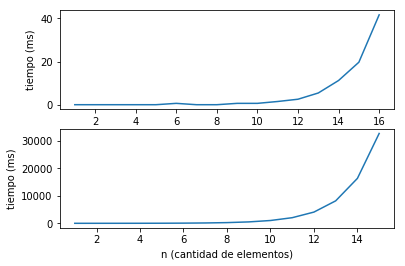

In [8]:
# Esto no es bueno hacerlo, porque no permite ver bien diferencias.
fig = plt.figure()
# Ploteamos curva de tiempo de IS.
ax1 = fig.add_subplot(211)
ax1 = sns.lineplot(x="n", y="tiempopromedio(ms)", data=g1);
plt.ylabel("tiempo (ms)")

# Ploteamos curva de complejidad.
df_cuadratico = pd.DataFrame({"x": [i for i in range(1, 16)], "y": [2**i for i in range(1, 16)]});
ax2 = fig.add_subplot(212)
ax2 = sns.lineplot(x="x", y="y", data=df_cuadratico);
plt.ylabel("tiempo (ms)");
plt.xlabel("n (cantidad de elementos)");



Por lo tanto, ahora los graficamos en la misma figura y podemos compararlos de manera más fácil.

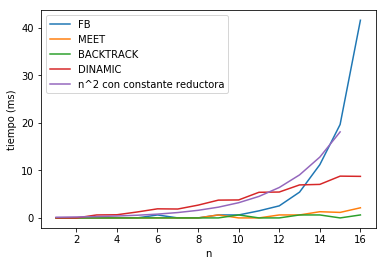

In [9]:
# Esto no es bueno hacerlo, porque no permite ver bien diferencias.
fig = plt.figure();
# Ploteamos curva de tiempo de IS vs la curva de complejidad.
df_cuadratico = pd.DataFrame({"n": [i for i in range(1, 16)], "IS": [0.1*2**(i/2) for i in range(1, 16)]});
ax1 = sns.lineplot(x="n", y="tiempopromedio(ms)", data=g1);
ax1 = sns.lineplot(x="n", y="tiempopromedio(ms)", data=g2);
ax1 = sns.lineplot(x="n", y="tiempopromedio(ms)", data=g3);
ax1 = sns.lineplot(x="n", y="tiempopromedio(ms)", data=g4);
ax1 = sns.lineplot(x="n", y="IS", data=df_cuadratico);
#ax1.legend(["MEET","BACKTRACK","DINAMIC"]);
#ax1.legend(["MEET","BACKTRACK","DINAMIC", "n^2 con constante reductora"]);
ax1.legend(["FB","MEET","BACKTRACK","DINAMIC", "n^2 con constante reductora"]);
plt.ylabel("tiempo (ms)");

Parece que IS en la practica es lineal... En realidad no, es porque la constante de n^2 se come a la de IS. 
<br /> Podemos ajustar esa constante y tomar 0.5e-6 para ver si la forma se parece. Este proceso es muy a mano. Tiene que haber algo mejor...

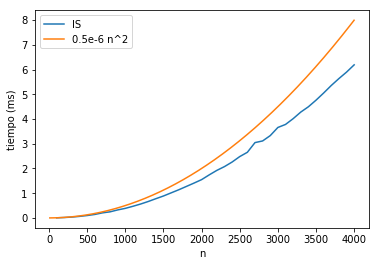

In [10]:
# Esto no es bueno hacerlo, porque no permite ver bien diferencias.
fig = plt.figure();
# Ploteamos curva de tiempo de IS vs la curva de complejidad.
df_cuadratico = pd.DataFrame({"n": [i for i in range(10, 4000)], "IS": [0.5e-6*(i**2) for i in range(10, 4000)]});
ax1 = sns.lineplot(x="n", y="IS", data=df);
ax1 = sns.lineplot(x="n", y="IS", data=df_cuadratico);
ax1.legend(["IS", "0.5e-6 n^2"]);
plt.ylabel("tiempo (ms)");

## Correlación
Una manera más precisa de ver si dos series de datos o variables correlacionan, es intentar ver el crecimiento de las dos series en paralelo. Por ejemplo, por cada valor de n, existe un valor IS(n) que es el tiempo de ejecución real del algoritmo y un valor cota(n)=n^2. Podemos tomar estos valores ordenados en dos vectores X=[IS(1), IS(2), ...], Y=[cota(1), cota(2), ...] y graficar una serie de puntos.

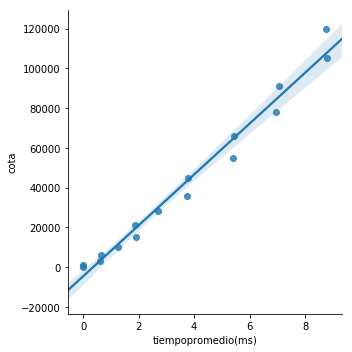

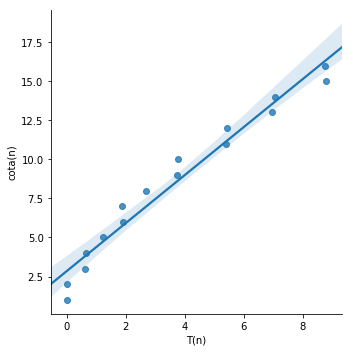

In [11]:
# Creamos la columna cota que vale n^2.
g4["cota"] = (g4["n"])*(g4["peso"])
df2 = pd.DataFrame({'tiempopromedio(ms)':tuple(g4["tiempopromedio(ms)"]), 'cota':tuple(g4["cota"])});
ax1 = sns.lmplot(x='tiempopromedio(ms)', y='cota', data=df2);
ax1 = sns.lmplot(x='tiempopromedio(ms)', y='n', data=g4);
plt.xlabel("T(n)");
plt.ylabel("cota(n)");

### Coeficiente de correlación de Pearson
Para ver si dos funciones correlacionan, es decir, si se parecen y cuánto se parecen, podemos usar alguna técnica un poco más avanzada. Por ejemplo, el coeficiente de correlación de Pearson ( https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson ). <br />
La idea es tomar alguna medida que sea independiente de las magnitudes y solamente indique si dos funciones o series de datos crecen o decrecen del mismo modo (o si hay una correlación negativa, es decir, cuando uno crece el otro decrece). <br />
Para calcularlo se utiliza el siguiente calculo
![Calculo del coeficiente de correlación de Pearson](img/pearson.png)
donde xi es el valor de la muestra i de la primera serie de datos, e y_i es el valor de la muestra i de la segunda serie de datos. <br /> <br />

El resultado de esta expresión es un número entre -1 y 1 que indica lo siguiente ( https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson ):
* Si r = 1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.
* Si 0 < r < 1, existe una correlación positiva.
* Si r = 0, no existe relación lineal. Pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.
* Si -1 < r < 0, existe una correlación negativa.
* Si r = -1, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante.

In [12]:
# corrcoef es una función de numpy que indica el coeficiente de correlacion de Pearson.
r = np.corrcoef(df2["tiempopromedio(ms)"], df2["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))
    

El coeficiente de correlación de Pearson es: r=0.9898183926650753


Por lo tanto, podemos concluir que hay una correlación positiva casi perfecta entre el tiempo de ejecución y la complejidad algorítmica.